# Segmentación con KMeans

**Desarrollado por:** Orlando Patricio Chacón Molina

**Fecha de creación:** 2022-02-21

**Fecha de actualización:** 2022-02-26

In [1]:
#Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score


In [2]:
#Leer datos
filename = 'data/cust_seg.csv'
data = pd.read_csv(filename)
#data.drop(columns=['DebtIncomeRatio','Other Debt','Income'], inplace=True)
data.head()

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [3]:
data.shape

(850, 10)

In [4]:
data.nunique()

Unnamed: 0         850
Customer Id        850
Age                 37
Edu                  5
Years Employed      33
Income             129
Card Debt          727
Other Debt         788
Defaulted            2
DebtIncomeRatio    245
dtype: int64

In [5]:
data.isna().mean()

Unnamed: 0         0.000000
Customer Id        0.000000
Age                0.000000
Edu                0.000000
Years Employed     0.000000
Income             0.000000
Card Debt          0.000000
Other Debt         0.000000
Defaulted          0.176471
DebtIncomeRatio    0.000000
dtype: float64

In [6]:
data = data.dropna()

In [7]:
# Borrar columnas irrelvantes.
scaledData = data.drop(columns=['Unnamed: 0','Customer Id']).copy()

In [8]:
# Escalar datos
scaler = StandardScaler()
scaledData = scaler.fit_transform(scaledData)
pd.DataFrame(scaledData).min()

0   -1.859446
1   -0.779325
2   -1.260817
3   -0.859016
4   -0.728637
5   -0.916898
6   -0.594950
7   -1.445332
dtype: float64

In [9]:
def graphKmeansMultiScater(nClusters):
    # Crear objeto kmeans con el clasificador KMeans()
    # Se establecen 3 grupos
    kmeans = KMeans(n_clusters = nClusters, random_state=3)

    # Entrenamiento con los datos escalados
    kmeans.fit(scaledData)

    # Agregar una columna (cluster) al DataFrame Original 
    data['cluster'] = kmeans.labels_
    print(data.groupby('cluster').count()['Customer Id'].to_frame().rename(columns={'Customer Id':'Fecuencia'}).reset_index())

    # Número máximo de columnas que tendrá el gráfico
    maxColumns = 3
    
    # Combinaciones de dos
    k = 2

    # Cantidad de características
    n = data.shape[1]-3
    # calcular las cantidad de combinaciones de k en n 
    nComb = math.factorial(n) / (math.factorial(n - k) * math.factorial(k))
    
    # Cantidad de filas, basado en la cantidad de combinaciones
    maxRows = math.ceil(nComb/maxColumns)

    # Inicializar el gráfico matplotlib.
    fig, axes = plt.subplots(maxRows, maxColumns, figsize=(16,maxRows * 4))


    # Variabls auxiliares para el conteo de filas y columnas
    row = 0
    col = 0

    # Generar iterativamente todas las combinaciones de gráficos (2 variables)
    for i in range(2, data.shape[1]-2):
        for j in range(i+1, data.shape[1]-1):
            axes[row,col].scatter(data.iloc[:,i], data.iloc[:,j], c = data['cluster'], alpha=0.9, s =5)
            axes[row,col].set_xlabel(data.iloc[:,i].name)
            axes[row,col].set_ylabel(data.iloc[:,j].name)
            axes[row,col].set_title(f'Relation: {data.iloc[:,i].name} - {data.iloc[:,j].name}')
            
            col += 1 # cambio de columna
            # Si se ha llegado a la última columna se retorna a la primera y se crea una fila nueva
            if col >= (maxColumns):
                row += 1
                col = 0

    #Ajustar automáticamente el gráfico
    fig.tight_layout()
    fig.suptitle('Visualización de clustes por pares de variables', y=1.01)
    fig.subplots_adjust(hspace=0.4)

   cluster  Fecuencia
0        0        170
1        1         93
2        2        141
3        3        285
4        4         11


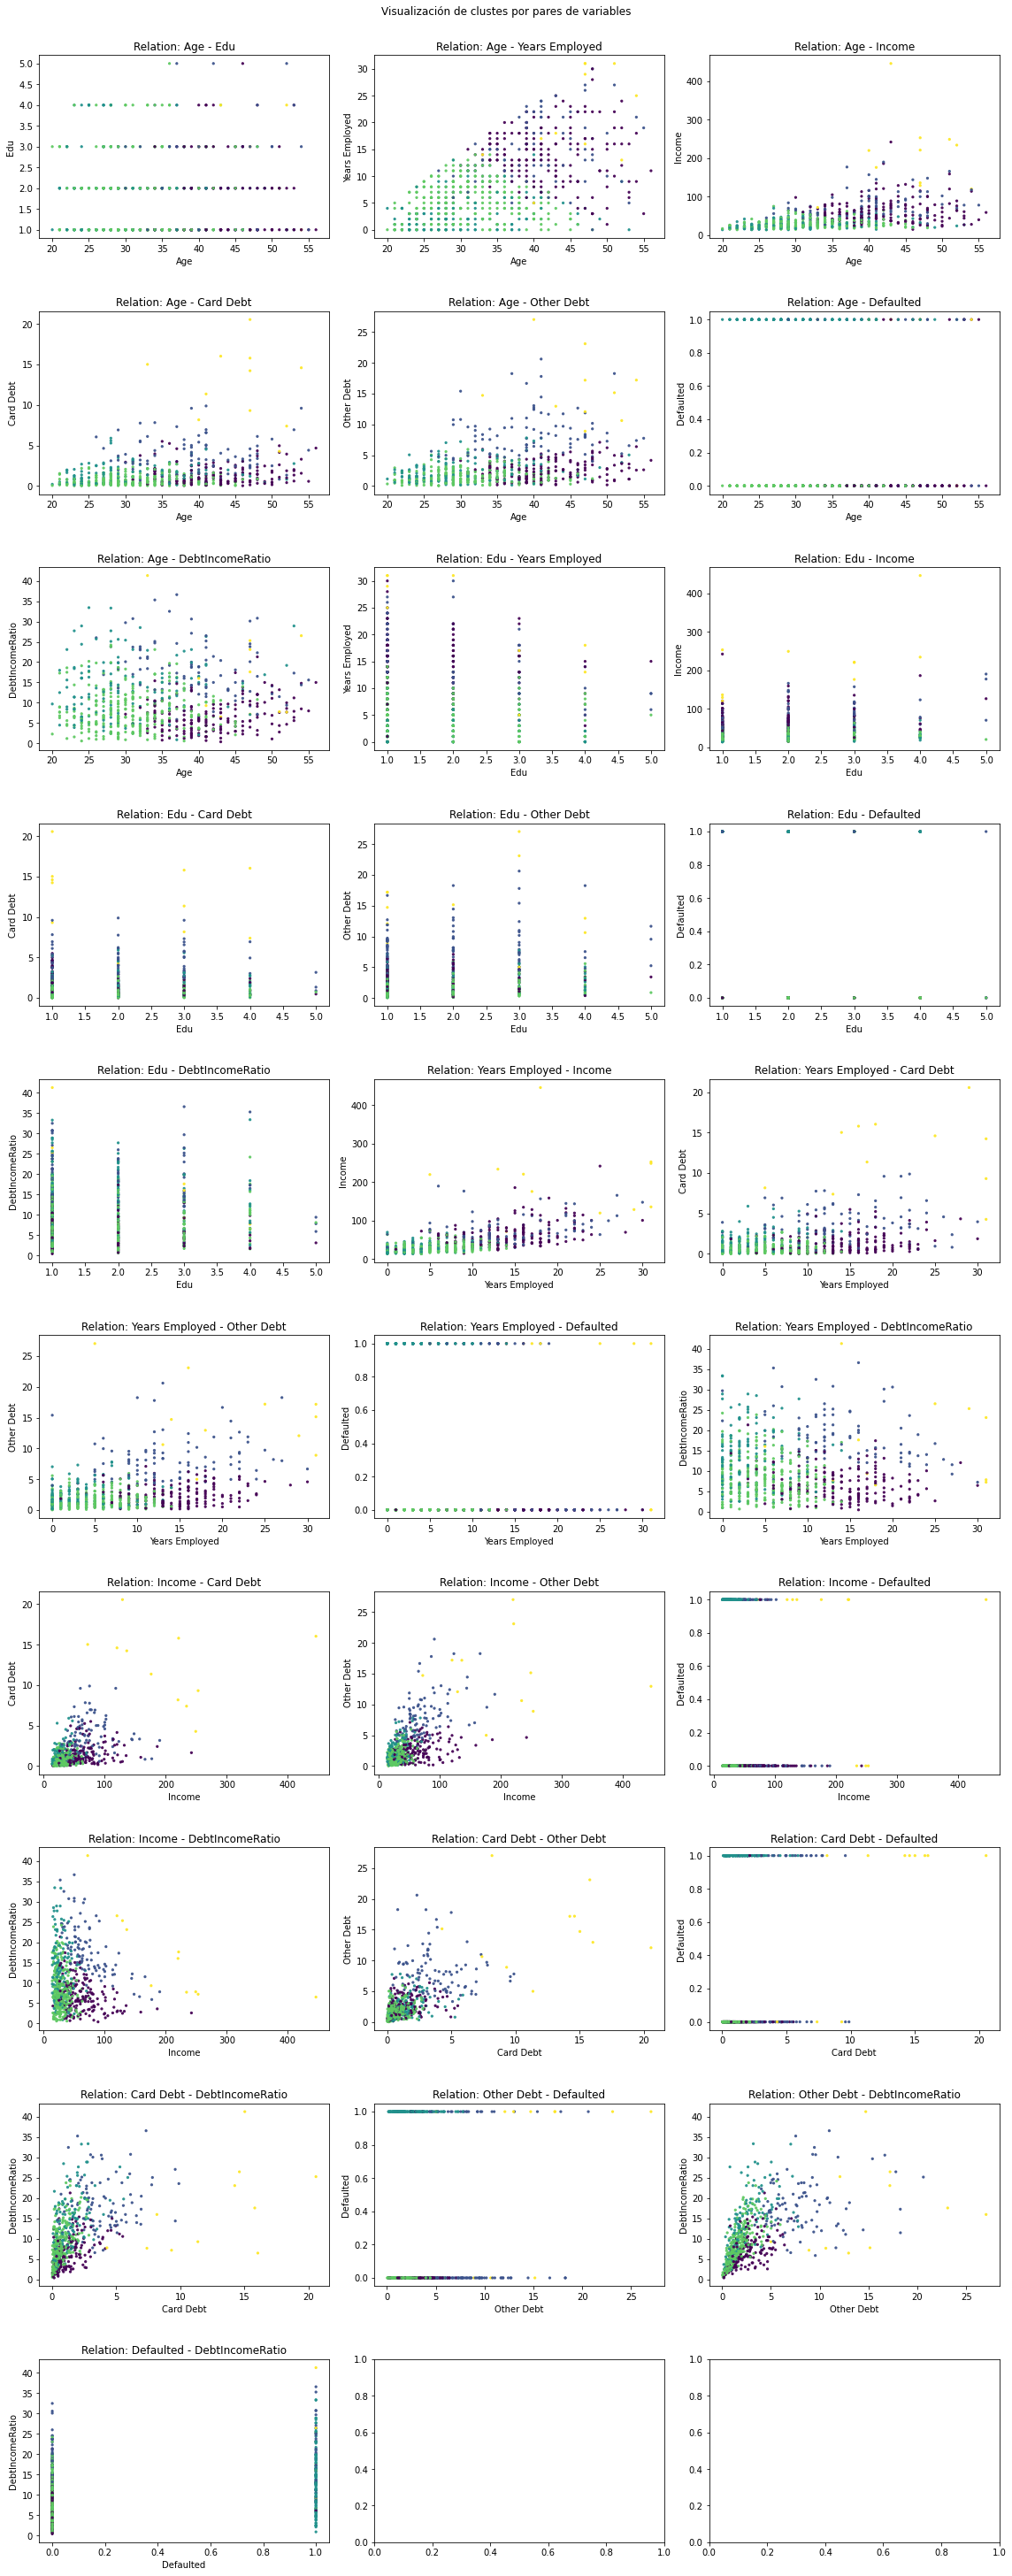

In [35]:
graphKmeansMultiScater(5)

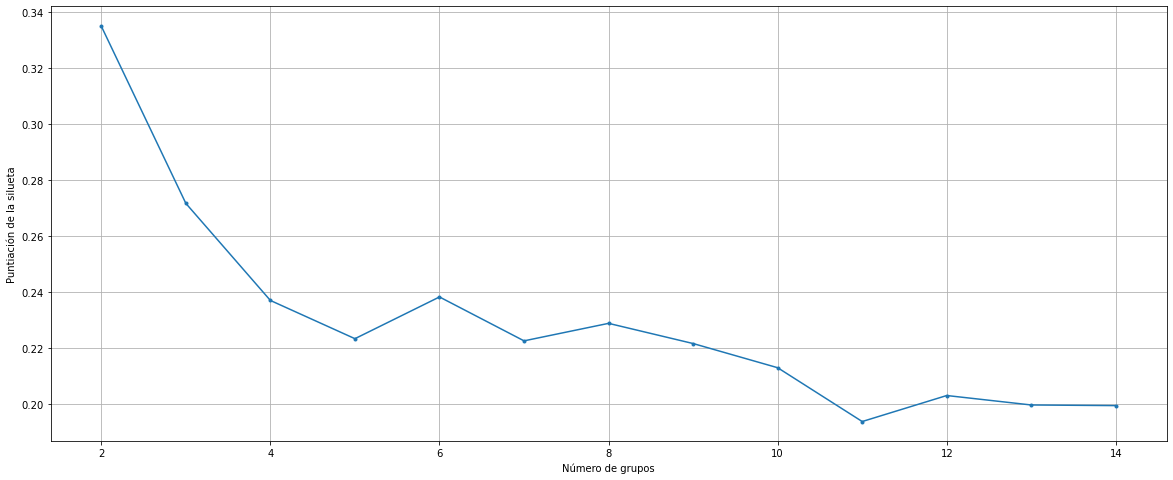

In [11]:
silhouette_scores = []
maxNClasses=15
for i in range (2,maxNClasses):
    kmeans = KMeans(n_clusters = i, random_state=3)
    # Entrenamiento con los datos escalados
    kmeans.fit(scaledData)

    # Agregar una columna (cluster) al DataFrame Original 
    data['cluster'] = kmeans.labels_

    silhouette_scores.append(silhouette_score(scaledData, kmeans.labels_))

fig, ax = plt.subplots(1,1,figsize=(20,8))
ax.grid()
ax.plot(range(2, maxNClasses), silhouette_scores, marker = '.')
ax.set_xlabel('Número de grupos')
ax.set_ylabel('Puntiación de la silueta');

    

In [12]:
def graphDbscanMultiScater(epsillon):
    # Crear objeto dbscan con el clasificador DBSCAN()
    dbscan = DBSCAN(eps = epsillon, min_samples=5)

    # Entrenamiento con los datos escalados
    dbscan.fit(scaledData)

    # Agregar una columna (cluster) al DataFrame Original 
    data['cluster'] = dbscan.labels_
    print(data.groupby('cluster').count()['Customer Id'].to_frame().rename(columns={'Customer Id':'Fecuencia'}).reset_index())

    # Número máximo de columnas que tendrá el gráfico
    maxColumns = 3
    
    # Combinaciones de dos
    k = 2

    # Cantidad de características
    n = data.shape[1]-3
    # calcular las cantidad de combinaciones de k en n 
    nComb = math.factorial(n) / (math.factorial(n - k) * math.factorial(k))
    
    # Cantidad de filas, basado en la cantidad de combinaciones
    maxRows = math.ceil(nComb/maxColumns)

    # Inicializar el gráfico matplotlib.
    fig, axes = plt.subplots(maxRows, maxColumns, figsize=(16,maxRows * 4))


    # Variabls auxiliares para el conteo de filas y columnas
    row = 0
    col = 0

    # Generar iterativamente todas las combinaciones de gráficos (2 variables)
    for i in range(2, data.shape[1]-2):
        for j in range(i+1, data.shape[1]-1):
            axes[row,col].scatter(data.iloc[:,i], data.iloc[:,j], c = data['cluster'], alpha=0.9, s =5)
            axes[row,col].set_xlabel(data.iloc[:,i].name)
            axes[row,col].set_ylabel(data.iloc[:,j].name)
            axes[row,col].set_title(f'Relation: {data.iloc[:,i].name} - {data.iloc[:,j].name}')
            
            col += 1 # cambio de columna
            # Si se ha llegado a la última columna se retorna a la primera y se crea una fila nueva
            if col >= (maxColumns):
                row += 1
                col = 0

    #Ajustar automáticamente el gráfico
    fig.tight_layout()
    fig.suptitle('Visualización de clustes por pares de variables', y=1.01)
    fig.subplots_adjust(hspace=0.4)

array([[ 0.76830405,  0.29879269, -0.35900652, ..., -0.60428433,
        -0.59494973, -0.58052847],
       [ 1.51908977, -0.77932527,  2.64702891, ...,  1.5706204 ,
        -0.59494973,  0.37222169],
       [-0.23274357,  0.29879269,  0.24220057, ...,  0.83520125,
         1.68081427,  1.55949495],
       ...,
       [-1.2337912 ,  2.45502862, -1.26081715, ...,  0.04620852,
         1.68081427,  3.39170678],
       [-0.35787453, -0.77932527,  0.54280411, ..., -0.71904138,
        -0.59494973, -1.07889008],
       [ 2.14474454, -0.77932527,  1.1440112 , ...,  0.17648972,
        -0.59494973, -0.24340149]])

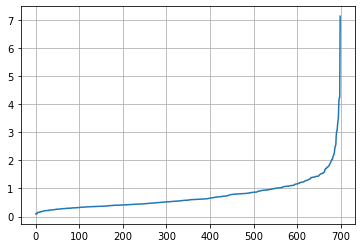

In [13]:

# https://towardsdatascience.com/machine-learning-clustering-dbscan-determine-the-optimal-value-for-epsilon-eps-python-example-3100091cfbc

# Gráfico del vecino más cercano para intentar estimar un valor de épsilon adecuado para el conjunto de datos


from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(scaledData)
distances, indices = nbrs.kneighbors(scaledData)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.grid()
scaledData

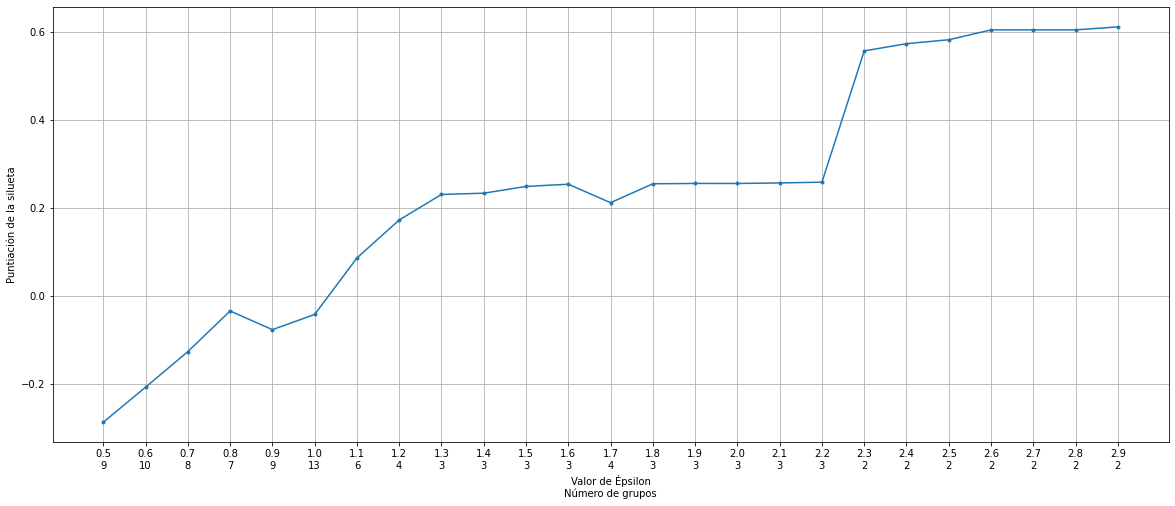

In [14]:
silhouette_scores = []
maxNClasses=10
xLabels = []
epsilonFac=0.1
for i in range (5,30):
    #dbscan = DBSCAN(min_samples=10,eps=i*epsilonFac) # Default epsilon
    dbscan = DBSCAN(eps=i*epsilonFac, min_samples=5, metric='euclidean', metric_params=None, algorithm='auto', leaf_size=30, p=None, n_jobs=None)

    # Entrenamiento con los datos escalados
    dbscan.fit(scaledData)
    # Agregar una columna (cluster) al DataFrame Original 
    data['cluster'] = dbscan.labels_
    (unique, counts) = np.unique(dbscan.labels_, return_counts=True)
    xLabels.append(str(round(i*epsilonFac,2)) + "\n" + str(len(unique)))
    
    silhouette_scores.append(silhouette_score(scaledData, dbscan.labels_))
    #print("Unique")
    #print(data.groupby('cluster').count()['Customer Id'])

fig, ax = plt.subplots(1,1,figsize=(20,8))
ax.grid()
ax.plot(xLabels, silhouette_scores, marker = '.')
ax.set_xlabel('Valor de Épsilon\nNúmero de grupos')
ax.set_ylabel('Puntiación de la silueta');

   cluster  Fecuencia
0       -1         23
1        0        508
2        1        169


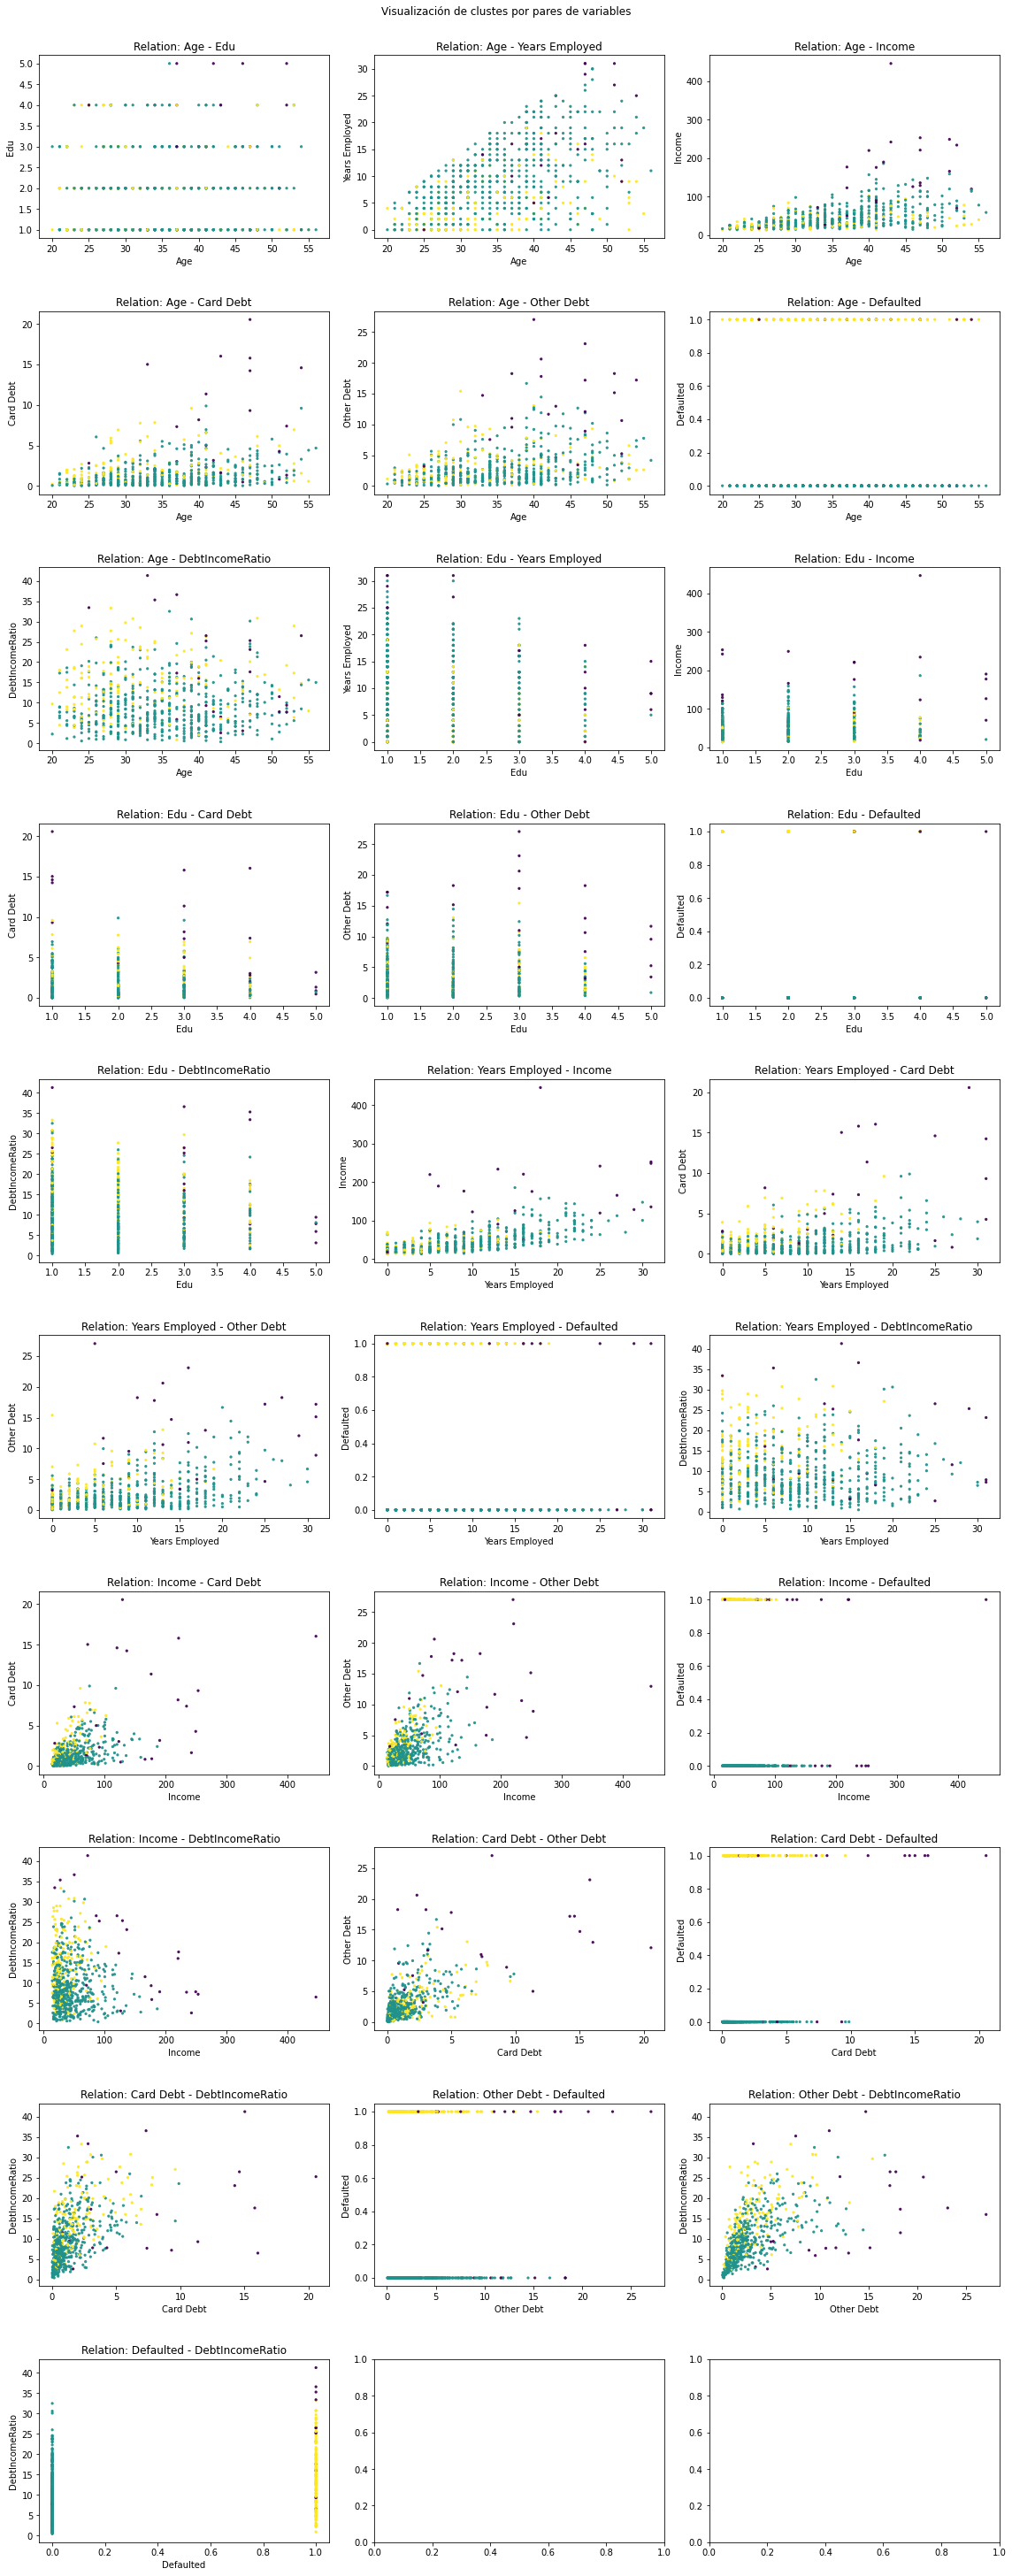

In [43]:
graphDbscanMultiScater(2.2)

## Agrupación jerárquica utilizando AgglomerativeClustering

In [44]:
def graphAggClMultiScater(nClusters):
    # Crear objeto agClustering con el clasificador AgglomerativeClustering()
    # Se establecen 3 grupos
    agClustering = AgglomerativeClustering(n_clusters = nClusters)

    # Entrenamiento con los datos escalados
    agClustering.fit(scaledData)

    # Agregar una columna (cluster) al DataFrame Original 
    data['cluster'] = agClustering.labels_
    print(data.groupby('cluster').count()['Customer Id'].to_frame().rename(columns={'Customer Id':'Fecuencia'}).reset_index())

    # Número máximo de columnas que tendrá el gráfico
    maxColumns = 3
    
    # Combinaciones de dos
    k = 2

    # Cantidad de características
    n = data.shape[1]-3
    # calcular las cantidad de combinaciones de k en n 
    nComb = math.factorial(n) / (math.factorial(n - k) * math.factorial(k))
    
    # Cantidad de filas, basado en la cantidad de combinaciones
    maxRows = math.ceil(nComb/maxColumns)

    # Inicializar el gráfico matplotlib.
    fig, axes = plt.subplots(maxRows, maxColumns, figsize=(16,maxRows * 4))


    # Variabls auxiliares para el conteo de filas y columnas
    row = 0
    col = 0

    # Generar iterativamente todas las combinaciones de gráficos (2 variables)
    for i in range(2, data.shape[1]-2):
        for j in range(i+1, data.shape[1]-1):
            axes[row,col].scatter(data.iloc[:,i], data.iloc[:,j], c = data['cluster'], alpha=0.9, s =5)
            axes[row,col].set_xlabel(data.iloc[:,i].name)
            axes[row,col].set_ylabel(data.iloc[:,j].name)
            axes[row,col].set_title(f'Relation: {data.iloc[:,i].name} - {data.iloc[:,j].name}')
            
            col += 1 # cambio de columna
            # Si se ha llegado a la última columna se retorna a la primera y se crea una fila nueva
            if col >= (maxColumns):
                row += 1
                col = 0

    #Ajustar automáticamente el gráfico
    fig.tight_layout()
    fig.suptitle('Visualización de clustes por pares de variables', y=1.01)
    fig.subplots_adjust(hspace=0.4)

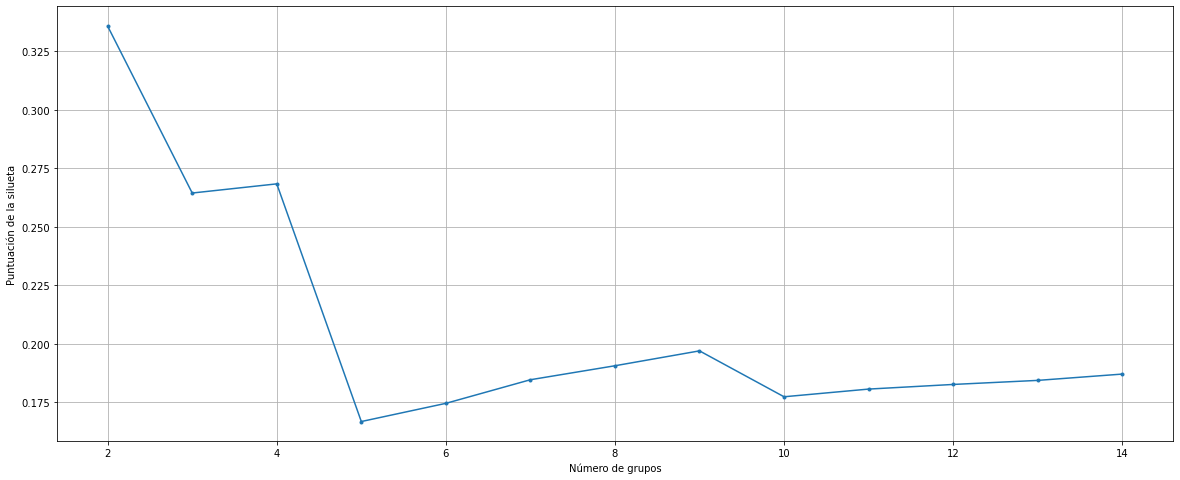

In [45]:
silhouette_scores = []
maxNClasses=15
for i in range (2,maxNClasses):
    agClustering = AgglomerativeClustering(n_clusters = i )
    # Entrenamiento con los datos escalados
    agClustering.fit(scaledData)

    # Agregar una columna (cluster) al DataFrame Original 
    data['cluster'] = agClustering.labels_

    silhouette_scores.append(silhouette_score(scaledData, agClustering.labels_))

fig, ax = plt.subplots(1,1,figsize=(20,8))
ax.grid()
ax.plot(range(2, maxNClasses), silhouette_scores, marker = '.')
ax.set_xlabel('Número de grupos')
ax.set_ylabel('Puntuación de la silueta');

   cluster  Fecuencia
0        0        240
1        1        106
2        2        164
3        3          7
4        4        183


array([[ 0.76830405,  0.29879269, -0.35900652, ..., -0.60428433,
        -0.59494973, -0.58052847],
       [ 1.51908977, -0.77932527,  2.64702891, ...,  1.5706204 ,
        -0.59494973,  0.37222169],
       [-0.23274357,  0.29879269,  0.24220057, ...,  0.83520125,
         1.68081427,  1.55949495],
       ...,
       [-1.2337912 ,  2.45502862, -1.26081715, ...,  0.04620852,
         1.68081427,  3.39170678],
       [-0.35787453, -0.77932527,  0.54280411, ..., -0.71904138,
        -0.59494973, -1.07889008],
       [ 2.14474454, -0.77932527,  1.1440112 , ...,  0.17648972,
        -0.59494973, -0.24340149]])

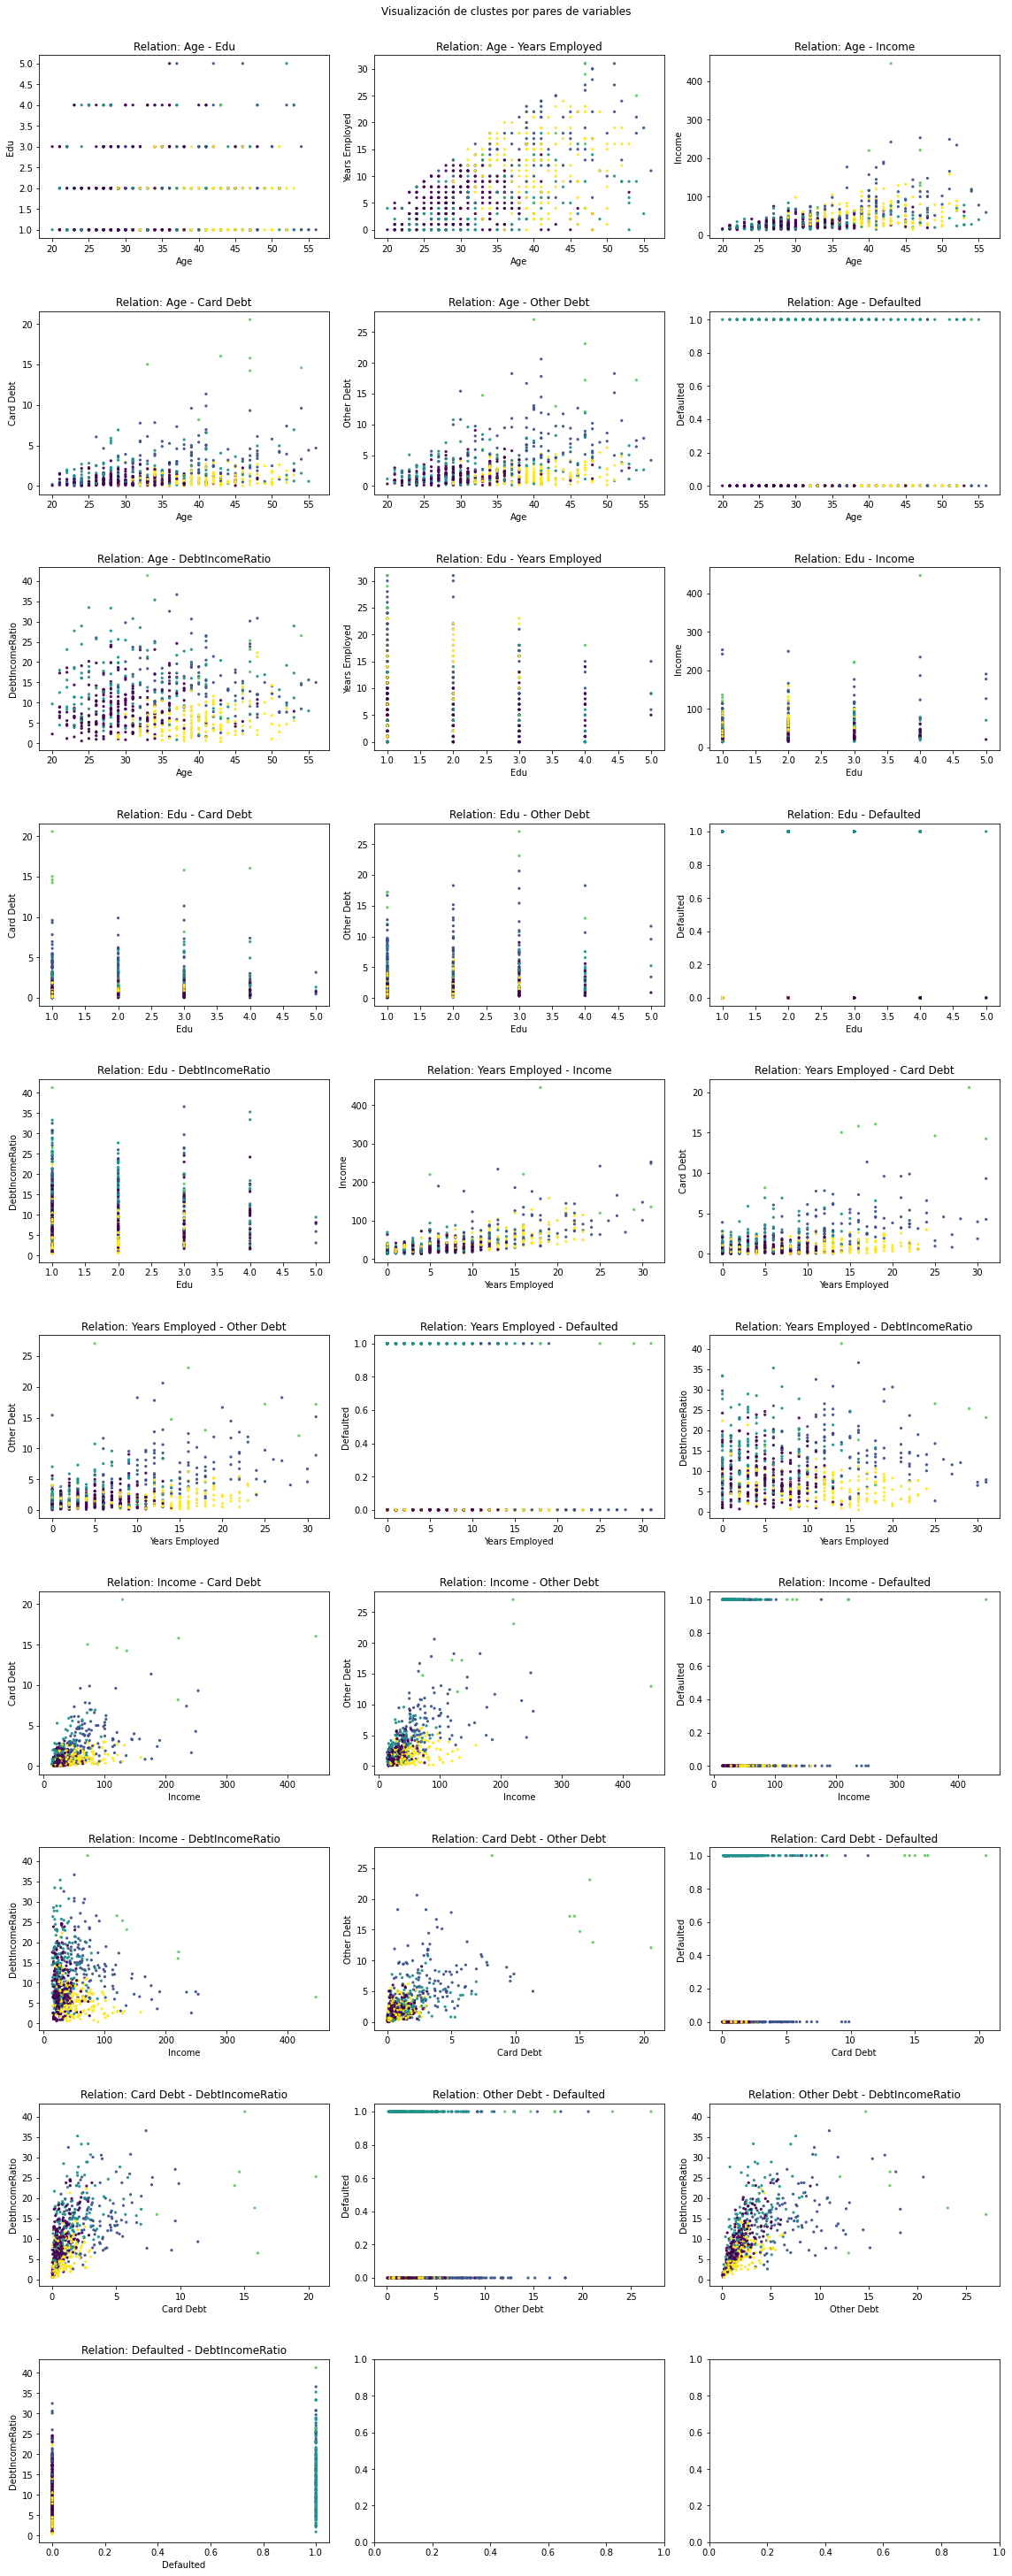

In [47]:
graphAggClMultiScater(5)
scaledData

## Comparativa

Tanto KMeans como el agrupamiento aglomerativo exige que se establezca el número de clusters en los cuales se requiere agrupar los datos.
Por otro lado, DBSCAN estima, "automáticamente", los grupos al cual pertenece una observación, luego de establecer el hiperparámetro épsilon. Sin embargo, que a primera vista podrían considerarse como fortalezas (o debilidades), deben ajustarse con cautela para maximizar los resultados del modelo.

El valor de la silueta es una herramienta que resulta útil en la determinación de los hiperparámetros de los algoritmos de agrupación(Clustering). 
Un detalle a tener en cuenta cuando se usa el valor de la silueta, con el model DBScan, tiene que ver que con este modelo no se puede establecer el número de grupos sino el valor de épsilon (distancia máxima entre observaciones del mismo grupo). Por lo tanto, para intentar modificar el número de grupos, se puede probar modificando iterativamente el parámetro eps hasta conseguir el número de grupos deseado. 

Otro caso particular de DBSCAN, respecto a los otros dos modelos mencionados, está relacionado con las observaciones que se pudieron agrupar debido a que: (1) La distancia al cluster más cercana es mayor que épsilon, (2) La cantidad de vecinos es menor al número mínimo permitido por grupo. 